In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

import warnings
warnings.filterwarnings("ignore")

plt.rcParams.update({
    'savefig.dpi': 300, 
    "figure.dpi": 300,
    "font.family": "Arial",
    "font.size": 6,
    'xtick.direction': 'in',
    'ytick.direction': 'in',
    "xtick.major.size": 3,
    "ytick.major.size": 3,
    "lines.linewidth": 0.8,
})

cm = 1/2.54  # centimeters in inches

Supernova Remnant Association Probability

Credit: Natasha Hurley-Walker

In [3]:
from astropy.coordinates import SkyCoord
from astropy import units as u 

import pandas as pd

In [7]:
def find_closest_pulsars(gl, gb, psrs, longrange=20, latrange=1):
    c = SkyCoord(gl, gb, frame="galactic", unit = (u.deg, u.deg))
    dgl, dgb = psrs.spherical_offsets_to(c)
    idxcatalog = np.intersect1d(np.where(np.abs(dgl.deg) < longrange), np.where(np.abs(dgb.deg) < latrange))
    if gl < longrange:
        print("Warning: longitude search range overlaps the Galactic Centre. Histogram and resulting densities will not be accurate.")
    return idxcatalog

def plot_histograms(catalog, gl, gb, nbins = 7):
    # Based on: https://python-graph-gallery.com/86-avoid-overlapping-in-scatterplot-with-2d-density/
    fig = plt.figure(figsize=(8.9*cm,4.5*cm))
    ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
    cax = fig.add_axes([0.91, 0.1, 0.04, 0.8])
    h = ax.hist2d(catalog.galactic.l.value, catalog.galactic.b.value, bins=nbins, cmap=plt.cm.BuGn_r)
    ax.scatter(gl, gb, marker='x', color='black')
    ax.set_xlabel("Galactic longitude, l")
    ax.set_ylabel("Galactic latitude, b")
    ax.invert_xaxis()
    if not np.all(h[0]):
        print("Warning: binning has resulted in zero-value bins; density estimate may not be accurate.")
    # h[1,2] = x edges (longitude) and y edges (latitude) inclusive
    total_area = (h[1][-1]-h[1][0])*(h[2][-1]-h[2][0])
    bin_area = (h[1][1]-h[1][0])*(h[2][1]-h[2][0])
    cb = fig.colorbar(h[3], cax=cax, cmap=plt.cm.BuGn_r, label="Pulsar density (per {0:3.2} sq. deg.)".format(bin_area))
    # fig.savefig('2D_histogram_of_pulsar_positions.png', bbox_inches="tight")
    cent_bin = int(nbins/2)
    return h[0][cent_bin][cent_bin]/bin_area

3.08 pulsars per square degree at the location of G22.7-0.2
0.69 pulsars expected to lie within the 0.22 sq deg shell of G22.7-0.2


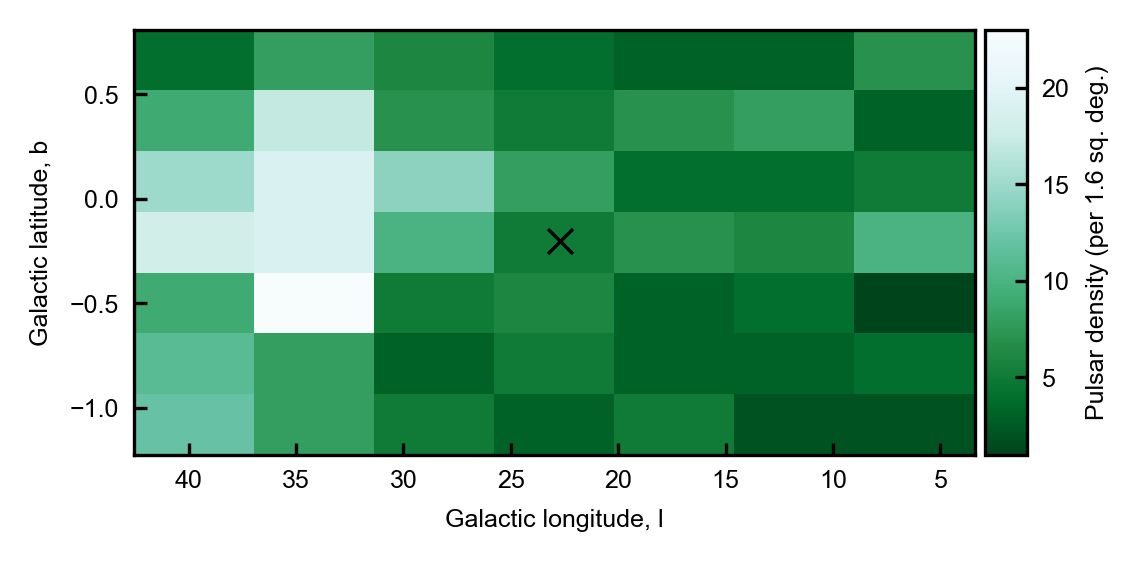

In [8]:
psrcat = "atnf_psrcat_2.5.1.csv"
psrs = pd.read_csv(psrcat)
catalog = SkyCoord(psrs["Gl"], psrs["Gb"], frame="galactic", unit = (u.deg, u.deg))

gl = 22.7
gb = -0.2
name = f"G{gl}{gb}"
diameter = 32./60. # Kassim+1992 says 30, Dokara+2021 says 33.8. Not sure where Dave Green gets 26

idxcatalog = find_closest_pulsars(gl, gb, catalog)
local_density = plot_histograms(catalog[idxcatalog], gl, gb, nbins=7)

snr_area = np.pi * (diameter/2.)**2

print("{0:2.2f} pulsars per square degree at the location of {1}".format(local_density, name))
print("{0:2.2f} pulsars expected to lie within the {1:2.2f} sq deg shell of {2}".format(snr_area*local_density, snr_area, name))